# LFW Dataset
Labelled faces in the wild, o LFW, és un dataset de reconeixement facial, amb imatges de personalitats com Bush (pare i fill), Chávez i d'altres famosos.

Podeu entrenar una xarxa neuronal per resoldre'l?

Resoldrem el problema només per aquelles persones de les quals tinguem més de 70 imatges (hi ha algunes que només en tenen una).

Com que no ens donen el test set fet, haurem de crear-lo nosaltres (fent un train-test split). Us donem el codi de càrrega del dataset, així com la partició.

Bona sort!

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

from tensorflow.python.keras import backend as K

from matplotlib import pyplot as plt

import numpy as np

2022-02-21 18:45:14.556003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-21 18:45:14.556042: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, data_home="~/.keras/datasets", download_if_missing=False)
x = lfw_people.images
y = lfw_people.target

names = lfw_people['target_names']

n_samples, img_rows, img_cols = x.shape
channels = 1
n_clases = len(np.unique(y))

print("Numero d'imatges:", n_samples)
# print("Resolució:({w}*{h})".format(w=w,h=h))
print("Numero de classes:", n_clases)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Numero d'imatges: 1288
Numero de classes: 7


Això és una mostra de com són les imatges:

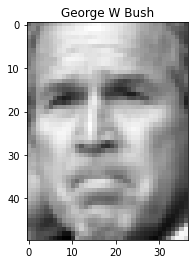

In [3]:
index = 486
plt.imshow(x_train[index],cmap='gray')
plt.title(names[y_train[index]]);

Hem deixat com a mostra un model similar a l'utilitzat al CIFAR.

Per poder utilitzar-ho necessitem transformar les imatges i els seus labels a un format compatible amb keras.

In [4]:
from tensorflow.python.keras.utils import to_categorical

y_train = to_categorical(y_train, n_clases)
y_test = to_categorical(y_test, n_clases)

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)
print(x_train.shape)

(966, 50, 37, 1)


In [9]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

nn = Sequential()
nn.add(Conv2D(filters=32, kernel_size=(2, 2), input_shape=input_shape, activation='relu', padding='same', strides=(2,2)))
nn.add(MaxPooling2D(pool_size=(2, 2)))
nn.add(Conv2D(16, (2, 2), activation='relu'))
nn.add(MaxPooling2D(pool_size=(2, 2)))
nn.add(Flatten())
nn.add(Dense(128, activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(n_clases, activation='softmax'))
nn.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
nepochs=10
history = nn.fit(x_train,y_train,batch_size=128,epochs=nepochs, validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 1s 90ms/step - loss: 407.7575 - accuracy: 0.2889 - val_loss: 1.9613 - val_accuracy: 0.4021
Epoch 2/10
7/7 [==============================] - 0s 46ms/step - loss: 1.9620 - accuracy: 0.3886 - val_loss: 2.7387 - val_accuracy: 0.3402
Epoch 3/10
7/7 [==============================] - 0s 42ms/step - loss: 2.0734 - accuracy: 0.3795 - val_loss: 1.9248 - val_accuracy: 0.4124
Epoch 4/10
7/7 [==============================] - 0s 43ms/step - loss: 1.9267 - accuracy: 0.3938 - val_loss: 1.9114 - val_accuracy: 0.4124
Epoch 5/10
7/7 [==============================] - 0s 50ms/step - loss: 1.9112 - accuracy: 0.3938 - val_loss: 1.9007 - val_accuracy: 0.4124
Epoch 6/10
7/7 [==============================] - 0s 49ms/step - loss: 1.8911 - accuracy: 0.3938 - val_loss: 14.1851 - val_accuracy: 0.4124
Epoch 7/10
7/7 [==============================] - 0s 42ms/step - loss: 3.7073 - accuracy: 0.3938 - val_loss: 1.8948 - val_accuracy: 0.4124
Epoch 8/10
7/7 [========

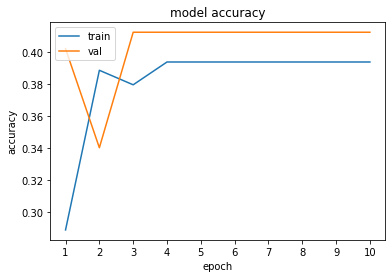

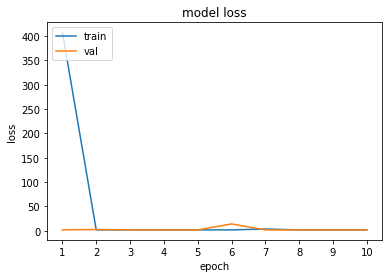

In [11]:
acc_plot = plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)]);
plt.legend(['train','val'], loc='upper left');
plt.show()

loss_plot = plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)]);
plt.legend(['train','val'], loc='upper left');
plt.show()